In [35]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

## Objective
The questions we're trying to explore:

1. Which are the most important figures in Greek Mythology?
2. How their importance evolves over time?
3. Main communities in this network and how they relate to each other?

Create Driver

In [36]:
driver = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\kagom\AppData\Local\Temp\ipykernel_28408\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [37]:
page_url = 'https://mythopedia.com/guides/greek-gods'
driver.get(page_url)


In [38]:
#Initializes a list of the main Greek Olympians
god_collections = driver.find_elements(By.CLASS_NAME, "Collection_title__z9IiP") 


In [39]:
god_collections[0].text

'Greek Olympians'

In [42]:
god_collections[0].get_attribute('href')


[<selenium.webdriver.remote.webelement.WebElement (session="8adde4343e1535d88da07dc84934e64e", element="8c4eef50-9b7c-4140-b409-339318e2a876")>, <selenium.webdriver.remote.webelement.WebElement (session="8adde4343e1535d88da07dc84934e64e", element="47a44a18-8ccd-4781-aed2-fbe0a4a2eaea")>, <selenium.webdriver.remote.webelement.WebElement (session="8adde4343e1535d88da07dc84934e64e", element="9d93849e-ddcf-4174-85c0-c08d671ab2a0")>, <selenium.webdriver.remote.webelement.WebElement (session="8adde4343e1535d88da07dc84934e64e", element="9d5d5954-a4a0-4944-91ff-7d062f71e48f")>]


In [43]:
god_names = driver.find_elements(By.CLASS_NAME, "Collection_title__3rYCA") 


In [44]:
god_names[0].text

'Zeus'

## Full Code

In [55]:
#Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

#Go to the list of the Greek God Collections page
page_url = 'https://mythopedia.com/guides/greek-gods'
driver.get(page_url)

#Let the elements fully render for the drive to access
time.sleep(3) 

#Find all the Greek God Collections on the page
god_collections = driver.find_elements(By.CLASS_NAME, "Collection_title__z9IiP") 

gc_list = [] #Initialize an empty list to fill with god collections "god collections list"
for collection in god_collections:
    gc_url = collection.find_element(By.TAG_NAME, "a").get_attribute("href") #Note: Have to find element by tag_name "a" because href is not on the class line
    gc_name = collection.text
    gc_list.append({"god_collection":gc_name, "url":gc_url})




C:\Users\kagom\AppData\Local\Temp\ipykernel_28408\3402563802.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [57]:
gn_list = [] #Initialize an empty list to fill with the names of the Greek gods "god names list"

for gc in gc_list:
    #go to each god collection page
    driver.get(gc['url'])

    god_names = driver.find_elements(By.CLASS_NAME, "Collection_title__3rYCA") 
    for name in god_names:
        gn_list.append({'collection': gc['god_collection'], 'god': name.text})


In [62]:
gods_df = pd.DataFrame(gn_list)
gods_df.head()

,collection,god
0,Greek Olympians,Zeus
1,Greek Olympians,Athena
2,Greek Olympians,Poseidon
3,Greek Olympians,Aphrodite
4,Greek Olympians,Hermes


In [63]:
import matplotlib.pyplot as plt

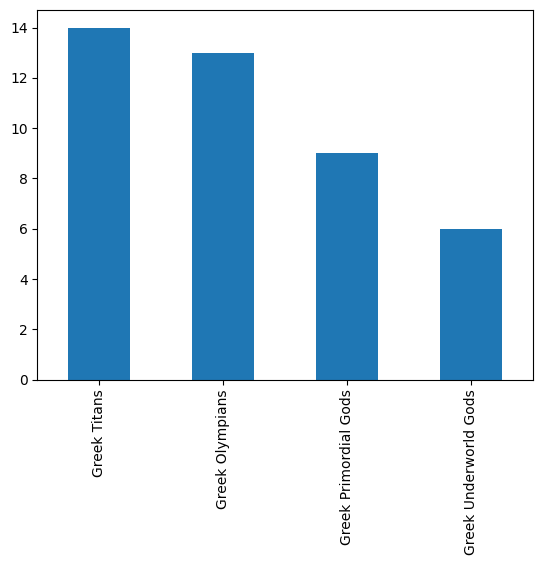

In [64]:
gods_df['collection'].value_counts().plot(kind='bar')
plt.show()

## Continued Analysis

We'll be installing spacy (NLP in Python) and networkx and pyvis.

Please see "extracting_relationships.ipynb"